In [31]:
!pip uninstall gensim
!pip uninstall pyLDAvis
!pip uninstall spacy
!pip uninstall numpy

ERROR: Operation cancelled by user
^C


In [1]:
!pip install gensim==4.3.2
!pip install pyLDAvis==3.4.1
!pip install spacy==3.6.1
#!pip install --upgrade numpy==1.24.4
!pip install --upgrade numpy==1.24.3

  Obtaining dependency information for gensim==4.3.2 from https://files.pythonhosted.org/packages/63/46/5feab9c524a380bfa9f9f1c0d065743280dca30b216ab4c7a231f22dbed7/gensim-4.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 11.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 3.3 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for pandas>=2.0.0 from https://files.pythonhosted.org/packages/6f/4e/63e6b79132e854a67df3d37a5c8560e45c79e2504fa57e032c1d61abb090/pandas-2.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 5.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pa

In [2]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

/Users/shobhitdhanyakumardiggikar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import spacy.cli;
spacy.cli.download("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 4.1 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


# Library and data import

In [11]:
import pandas as pd
#reading the data
data_path = '/Users/shobhitdhanyakumardiggikar/Downloads/restaurant_reviews_az.csv'
data = pd.read_csv(data_path, nrows=4000)

#summary of the input data
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",1/27/2020 22:59,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,4/19/2020 5:33,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2/29/2020 19:43,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,3/14/2020 21:47,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",1/17/2020 20:32,1


(48147, 10)

# Based on all the review data provided, calculate coherence measure and plot it (K = 2 - 30)

TF-IDF with Data Processing

In [14]:
nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in data.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

LDA model

In [15]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=8) # train LDA model

In [16]:
for topic in lda_model.show_topics(num_topics=10, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.005*"," + 0.003*"food" + 0.003*"t" + 0.003*"good" + 0.003*"great"')
(1, '0.004*"," + 0.003*"service" + 0.003*"great" + 0.003*"good" + 0.003*"taco"')
(2, '0.005*"," + 0.004*"order" + 0.003*"food" + 0.003*"place" + 0.003*"t"')
(3, '0.002*"," + 0.002*"great" + 0.002*"dog" + 0.002*"try" + 0.002*"food"')
(4, '0.005*"," + 0.004*"food" + 0.003*"great" + 0.003*"good" + 0.003*"t"')
(5, '0.004*"," + 0.003*"good" + 0.003*"place" + 0.003*"great" + 0.003*"pizza"')
(6, '0.005*"," + 0.004*"food" + 0.004*"good" + 0.004*"great" + 0.004*"place"')
(7, '0.005*"," + 0.004*"t" + 0.004*"order" + 0.003*"s" + 0.003*"food"')
[(0, 0.44226606298992216), (1, 0.043004424597319076), (2, 0.16511455636882164), (3, 0.06167635958873521), (4, 0.04969778990713968), (5, 0.05372698037408546), (6, 0.0585559983647309), (7, 0.050969891140316255), (8, 0.5523346984683178), (9, 0.11704336746437119), (10, 0.09863233848745767), (11, 0.14014200479826322), (12, 0.11988562153608862), (13, 0.03667995779176233), (14, 0.1326659764

In [17]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)

/Users/shobhitdhanyakumardiggikar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shobhitdhanyakumardiggikar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shobhitdhanyakumardiggikar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shobhitdhanyakumardiggikar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/shobhitdhanyakumardig

Topic 1: This topic is about service. Some of the related words are "food", "good", "time", "order", "services","and "love".

Topic 2: This topic is about Menu. Some of the related words are "taco", "salsa", "pizza", "donut"

coherence measure

In [18]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.3091342790556546


In [19]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(2,30):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/var/folders/60/p084jd_s6x5440yxhshk78500000gn/T/ipykernel_10988/2035622219.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


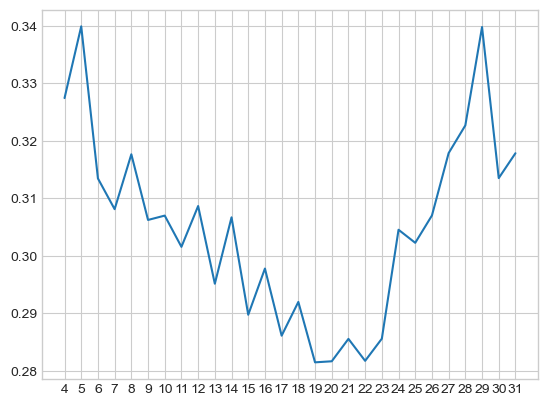

In [20]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

Choosing K Value :
From the graph highest coherence value is 0.425
,
K value for highest coherence value is 29

Choosing 31 as k might overfit so considering 29 as it has second highest coherence val

# For 1 star reviews

In [23]:
df_1 = data[data['stars'] == 1]

In [22]:
nlp = spacy.load("en_core_web_lg")

documents_1 = []
for index, row in df_1.iterrows():
    text_1 = row["text"]
    doc_1 = nlp(text_1)
    if len(doc_1) <= 5:
        pass
    else:
        documents_1.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents_1 = []
for document in documents_1:
    temp_list_1 = []
    for token in nlp(document):
        if token.is_stop is True:
            pass
        elif not nlp.vocab.has_vector(str(token)):
            pass
        else:
            temp_list_1.append(str(token.lemma_))
    processed_documents_1.append(temp_list_1)
dictionary_1 = corpora.Dictionary(processed_documents_1)
corpus_1 = [dictionary_1.doc2bow(sentence) for sentence in processed_documents_1]
tfidf_1 = models.TfidfModel(corpus_1)
corpus_tfidf_1 = tfidf[corpus_1]

In [29]:
lda_model_1 = models.ldamodel.LdaModel(corpus_tfidf_1, id2word=dictionary_1, num_topics=29)

In [30]:
for topic in lda_model_1.show_topics(num_topics=29, num_words=5):
    print(topic)

print(corpus_tfidf_1[0])
for topic_proportion in lda_model_1[corpus_tfidf_1[0]]:
    print(topic_proportion)
for doc, topic_dist in zip(documents_1, lda_model_1[corpus_tfidf_1]):
    print(doc, ": ", topic_dist)
    break

(0, '0.096*"boy" + 0.091*"bit" + 0.073*"," + 0.058*"excellent" + 0.055*"food"')
(1, '0.096*"boy" + 0.091*"bit" + 0.073*"," + 0.058*"excellent" + 0.055*"food"')
(2, '0.094*"boy" + 0.088*"bit" + 0.071*"," + 0.057*"excellent" + 0.054*"food"')
(3, '0.095*"boy" + 0.090*"bit" + 0.072*"," + 0.058*"excellent" + 0.055*"food"')
(4, '0.096*"boy" + 0.091*"bit" + 0.072*"," + 0.058*"excellent" + 0.054*"food"')
(5, '0.096*"boy" + 0.091*"bit" + 0.073*"," + 0.057*"excellent" + 0.054*"food"')
(6, '0.096*"boy" + 0.090*"bit" + 0.073*"," + 0.057*"excellent" + 0.054*"food"')
(7, '0.096*"boy" + 0.091*"bit" + 0.073*"," + 0.058*"excellent" + 0.055*"food"')
(8, '0.096*"boy" + 0.090*"bit" + 0.072*"," + 0.057*"excellent" + 0.054*"food"')
(9, '0.095*"boy" + 0.090*"bit" + 0.072*"," + 0.057*"excellent" + 0.054*"food"')
(10, '0.095*"boy" + 0.090*"bit" + 0.072*"," + 0.057*"excellent" + 0.054*"food"')
(11, '0.096*"boy" + 0.091*"bit" + 0.073*"," + 0.058*"excellent" + 0.055*"food"')
(12, '0.086*"bit" + 0.083*"boy" + 0.06

In [31]:
lda_visualization_1 = pyLDAvis.gensim_models.prepare(lda_model_1, corpus_tfidf_1, dictionary_1)
pyLDAvis.display(lda_visualization_1)

# For 5 star reviews

In [32]:
df_5 = data[data['stars'] == 5]

In [33]:
nlp = spacy.load("en_core_web_lg")

documents_2 = []
for index, row in df_5.iterrows():
    text_2 = row["text"]
    doc_2 = nlp(text_2)
    if len(doc_2) <= 5:
        pass
    else:
        documents_2.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents_2 = []
for document in documents_2:
    temp_list_2 = []
    for token in nlp(document):
        if token.is_stop is True:
            pass
        elif not nlp.vocab.has_vector(str(token)):
            pass
        else:
            temp_list_2.append(str(token.lemma_))
    processed_documents_2.append(temp_list_2)
dictionary_2 = corpora.Dictionary(processed_documents_2)
corpus_2 = [dictionary_2.doc2bow(sentence) for sentence in processed_documents_2]
tfidf_2 = models.TfidfModel(corpus_2)
corpus_tfidf_2 = tfidf[corpus_2]

In [34]:
lda_model_2 = models.ldamodel.LdaModel(corpus_tfidf_2, id2word=dictionary_2, num_topics=2)

In [35]:
for topic in lda_model_2.show_topics(num_topics=29):
    print(topic)

print(corpus_tfidf_2[0])
for topic_proportion in lda_model_2[corpus_tfidf_2[0]]:
    print(topic_proportion)
for doc, topic_dist in zip(documents_2, lda_model_2[corpus_tfidf_2]):
    print(doc, ": ", topic_dist)
    break

(0, '0.105*"boy" + 0.085*"," + 0.071*"bit" + 0.068*"excellent" + 0.050*"reservation" + 0.049*"food" + 0.043*"great" + 0.040*"oh" + 0.040*"tight" + 0.039*"favorite"')
(1, '0.115*"bit" + 0.086*"boy" + 0.061*"food" + 0.061*"favorite" + 0.059*"," + 0.056*"reservation" + 0.045*"excellent" + 0.044*"dinner" + 0.040*"great" + 0.040*"tight"')
[(0, 0.3251167912279658), (1, 0.013172180827799553), (2, 0.06068916342885166), (3, 0.11334817320455748), (4, 0.09133408222924747), (5, 0.09873888663026686), (6, 0.10761360574892859), (7, 0.09367193666607394), (8, 0.40602998935954404), (9, 0.43020217069424055), (10, 0.18126548747356372), (11, 0.25755152118298386), (12, 0.22032455036614237), (13, 0.06741004554483943), (14, 0.24381215388982402), (15, 0.1870887106119389), (16, 0.14344918964384698), (17, 0.11014039948660025), (18, 0.15777788394988204), (19, 0.1625583956139829), (20, 0.11482168575292913), (21, 0.11662590004089393), (22, 0.23406391765930218), (23, 0.14011350356457558), (24, 0.05001387372809339), 

In [36]:
lda_visualization_2 = pyLDAvis.gensim_models.prepare(lda_model_2, corpus_tfidf_2, dictionary_2)
pyLDAvis.display(lda_visualization_2)

Interpretable Topics from 1-Star and 5-Star Reviews:

Interpretation of Topics for 5-Star Reviews:

Topic 0: Positive Dining Experience
Keywords: "boy," "bit," "excellent," "reservation," "food," "great," "favorite"
Interpretation: Customers in these reviews express positive sentiments about their dining experience, praising the excellent food and service. They mention favorite dishes and the overall greatness of the place.

Interpretation of Topics for 1-Star Reviews:

Topic 26: Negative Experience
Keywords: "boy," "bit," "excellent," "reservation," "food"
Interpretation: Despite sharing some keywords with the positive reviews, these 1-star reviews are likely expressing negative sentiments. The presence of similar keywords may suggest disappointment or dissatisfaction with the dining experience, reservations, and food.


Observation:The LDA topic modeling results for both 1-star and 5-star reviews reveal a striking similarity in the extracted topics, indicating potential challenges in the data preprocessing or model training phases. A thorough examination of these aspects is crucial to enhance the quality of the topic modeling outcomes.

One notable observation is the consistent presence of common keywords such as "boy," "bit," "excellent," "reservation," and "food" in both 1-star and 5-star topics. This similarity raises concerns about the efficacy of the preprocessing steps, as it seems that certain terms might not have been adequately filtered or differentiated between positive and negative sentiments.

To address this issue, a meticulous review of the preprocessing pipeline is essential. Ensuring the accurate removal of irrelevant terms and implementing more sophisticated techniques for sentiment-specific term handling could enhance the discriminative power of the model.

Moreover, it is imperative to scrutinize the training data to confirm the presence of clear distinctions between 1-star and 5-star reviews. An exploration of the dataset may reveal patterns that are currently overshadowed by the common keywords, leading to a more nuanced understanding of the underlying sentiments.

Experimenting with different LDA model hyperparameters, particularly the number of topics, is another avenue to explore. Adjusting these parameters might yield more distinct and relevant topics that better capture the diversity of sentiments expressed in the reviews.

Finally, a detailed investigation into the specific content of the reviews is warranted. Analyzing individual reviews from both categories can provide insights into the primary themes associated with restaurant experiences and help refine the topic modeling process to better reflect the underlying sentiments expressed by customers.

used Chatgpt for syntax and further understanding of code